In [77]:
#Importation des bibliothèques nécéssaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [78]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [79]:
#Chargement des données
df_Marseille=pd.read_excel('/content/gdrive/MyDrive/FOR NEXA/Wind_Prediction/Marseille.xlsx')

In [80]:
#Convertir lees coplonnes en valeurs numériques
df_Marseille[['vitesse', 'pression', 'humidité', 'température']]=df_Marseille[['vitesse', 'pression', 'humidité', 'température']].apply(pd.to_numeric, errors='coerce')

In [81]:
#Chargement des données (cible)
df_PR=pd.read_excel('/content/gdrive/MyDrive/FOR NEXA/Wind_Prediction/V_PR.xlsx')

In [82]:
#Convertion des colonnes en valeurs numériques
df_PR['vitesse']=pd.to_numeric(df_PR['vitesse'], errors='coerce')

In [83]:
X=df_Marseille[['vitesse','pression', 'humidité', 'température']]
Y=df_PR['vitesse']

In [84]:
#Standarisation des variables
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [85]:
#Séparation des données entrainement et test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.3, random_state=42)

In [86]:
#Création du modèle de réseau de neurone
from sklearn.neural_network import MLPRegressor
model=MLPRegressor(hidden_layer_sizes=(100,50), random_state=42, max_iter=1500)
model.fit(X_train, Y_train)

MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1500, random_state=42)

In [87]:
#Application du modèle sur les données test
Y_predict=model.predict(X_test)

In [88]:
#Evaluation de la performance du modèle
from sklearn.metrics import r2_score, mean_squared_error
R2=r2_score(Y_test, Y_predict)
MSE=mean_squared_error(Y_test, Y_predict)
print(f"R2={R2:.3f}, MSE={MSE:.3f}")

R2=0.965, MSE=2.209


In [89]:
#Relation entre les valeurs prédites et réelles
a , b=np.polyfit(Y_test, Y_predict, deg=1)
y=a*Y_test+b

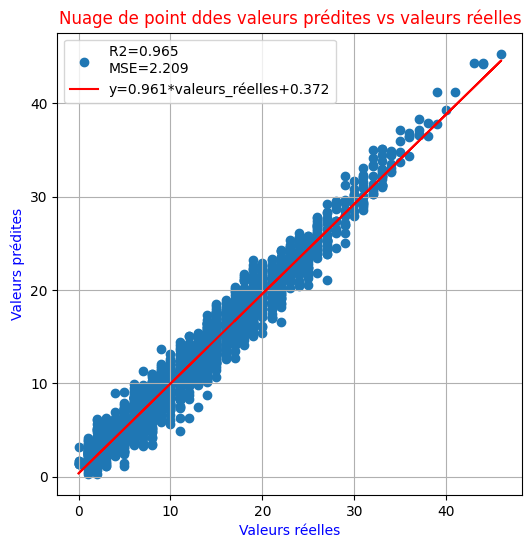

In [90]:
#Affichage des valeurs prédites en finction des valeurs réelles
plt.figure(figsize=(6,6))
plt.scatter(Y_test, Y_predict, label=f"R2={R2:.3f} \nMSE={MSE:.3f}")
plt.plot(Y_test, y, label=f"y={a:.3f}*valeurs_réelles+{b:.3f}", color='r')
plt.xlabel('Valeurs réelles', color='b')
plt.ylabel('Valeurs prédites', color='b')
plt.title('Nuage de point ddes valeurs prédites vs valeurs réelles', color='r')
plt.grid(True)
plt.legend()